<a href="https://colab.research.google.com/github/Nguyen-Van-Truong/ML2023/blob/main/B%C3%A0i_b%C3%A1o_c%C3%A1o_gi%E1%BB%AFa_k%E1%BB%B3_nh%C3%B3m39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/GK'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/GK


In [ ]:
# code
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
# chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
# thuật toán
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# so sánh
from sklearn.metrics import mean_squared_error, r2_score
# biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# code
# tải file data bỏ qua các dòng bị lỗi
car_prices = pd.read_csv('car_prices.csv', on_bad_lines='skip')
pd.set_option('expand_frame_repr', False)
# loại bỏ các dòng bị rỗng
car_prices.dropna(axis=0, inplace=True)
# rút gọn dữ liệu xuống n dòng
data = car_prices.sample(n = 10000, random_state= 13)
# data = car_prices.copy()
pd.options.display.max_rows = 4
print(data)


        year       make     model     trim   body transmission                vin state  condition  odometer   color interior                   seller    mmr  sellingprice                                 saledate
529895  2004      Honda    Accord       LX  sedan    automatic  1hgcm56384a080908    nv        2.8   97900.0  silver    black        fairway chevrolet   4450          5100  Thu Jun 11 2015 04:50:00 GMT-0700 (PDT)
282209  2015        Kia   Sorento       LX    SUV    automatic  5xyktca60fg586366    co        3.7   10322.0   black     gray  kia motors america, inc  20900         21400  Tue Feb 17 2015 04:00:00 GMT-0800 (PST)
...      ...        ...       ...      ...    ...          ...                ...   ...        ...       ...     ...      ...                      ...    ...           ...                                      ...
130590  2002  Chevrolet  Suburban  1500 LS    SUV    automatic  1gnfk16z52j166762    ny        2.2  173647.0   black    beige         tdaf remarketi

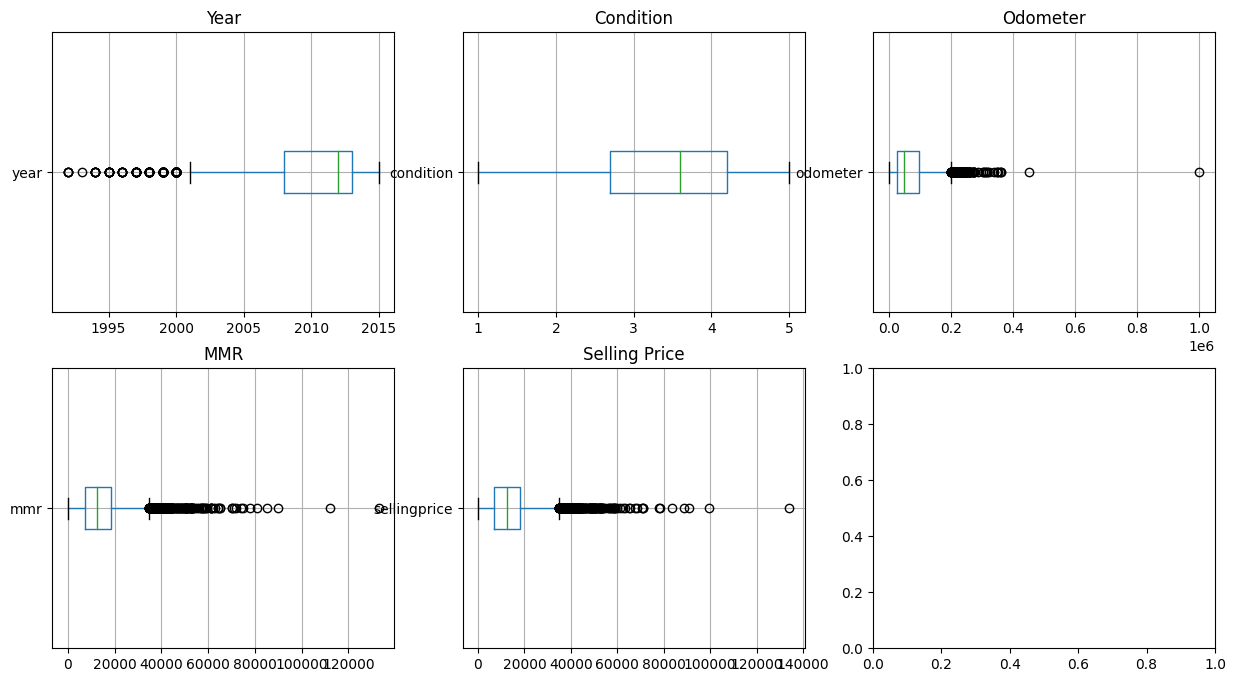

In [ ]:
# code
# vẽ biểu đồ để nhận xét các cột dữ liệu kiểu số
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

data.boxplot(column='year', ax=axes[0,0], vert=False)
data.boxplot(column='condition', ax=axes[0,1], vert=False)
data.boxplot(column='odometer', ax=axes[0,2], vert=False)
data.boxplot(column='mmr', ax=axes[1,0], vert=False)
data.boxplot(column='sellingprice', ax=axes[1,1], vert=False)

axes[0,0].set_title('Year')
axes[0,1].set_title('Condition')
axes[0,2].set_title('Odometer')
axes[1,0].set_title('MMR')
axes[1,1].set_title('Selling Price')

plt.show()

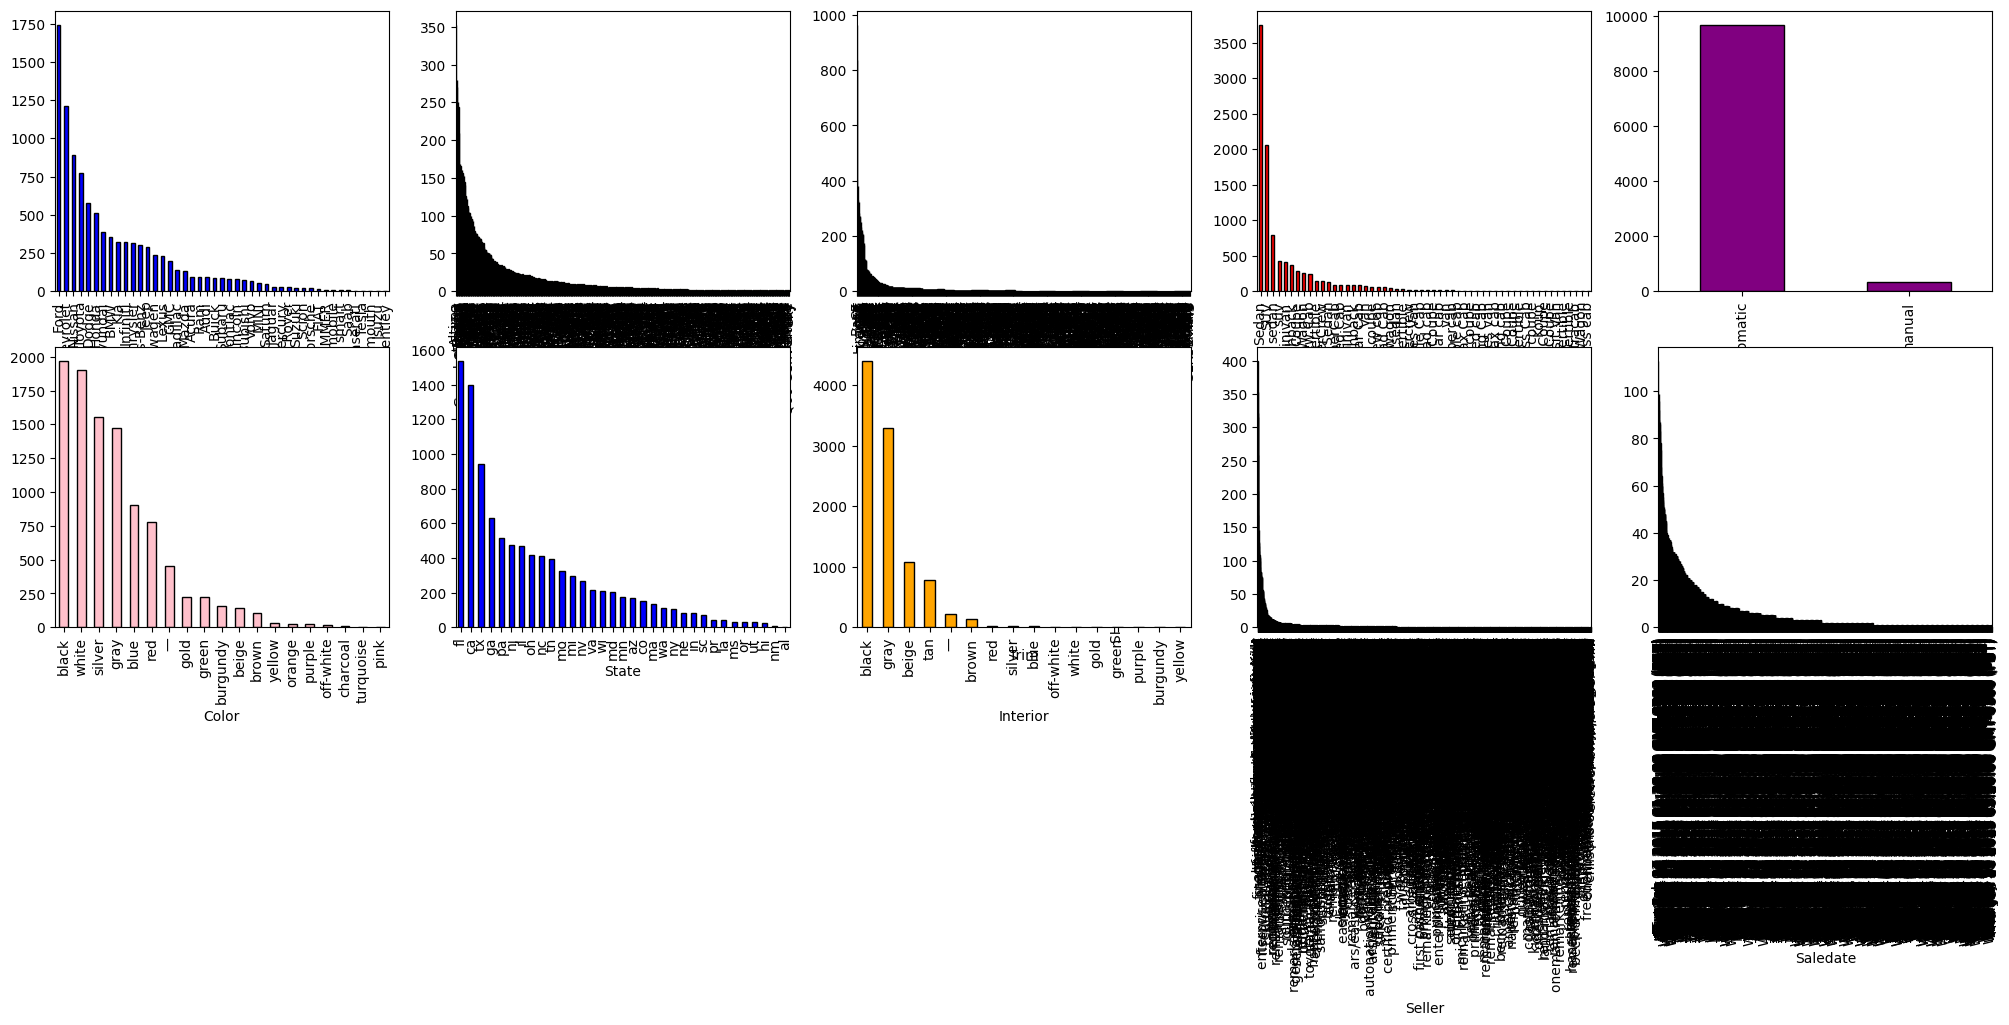

In [ ]:
# Vẽ biểu đồ cho các cột văn bản
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 8))

data['make'].value_counts().plot.bar(ax=axes[0,0], edgecolor='black', color='blue')
data['model'].value_counts().plot.bar(ax=axes[0,1], edgecolor='black', color='orange')
data['trim'].value_counts().plot.bar(ax=axes[0,2], edgecolor='black', color='green')
data['body'].value_counts().plot.bar(ax=axes[0,3], edgecolor='black', color='red')
data['transmission'].value_counts().plot.bar(ax=axes[0,4], edgecolor='black', color='purple')
data['color'].value_counts().plot.bar(ax=axes[1,0], edgecolor='black', color='pink')
data['state'].value_counts().plot.bar(ax=axes[1,1], edgecolor='black', color='blue')
data['interior'].value_counts().plot.bar(ax=axes[1,2], edgecolor='black', color='orange')
data['seller'].value_counts().plot.bar(ax=axes[1,3], edgecolor='black', color='green')
data['saledate'].value_counts().plot.bar(ax=axes[1,4], edgecolor='black', color='red')



axes[0,0].set_xlabel('Make')
axes[0,1].set_xlabel('Model')
axes[0,2].set_xlabel('Trim')
axes[0,3].set_xlabel('Body')
axes[0,4].set_xlabel('Transmission')
axes[1,0].set_xlabel('Color')
axes[1,1].set_xlabel('State')
axes[1,2].set_xlabel('Interior')
axes[1,3].set_xlabel('Seller')
axes[1,4].set_xlabel('Saledate')

plt.show()

In [ ]:
# xử lý ngoại lệ
columns = ['year', 'odometer', 'mmr', 'sellingprice']
for column in columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  # Loại bỏ các hàng có giá trị nằm ngoài khoảng IQR cho cột 'year'
  data = data[~((data[column] < (Q1 - 1 * IQR)) | (data[column] > (Q3 + 1 * IQR)))]

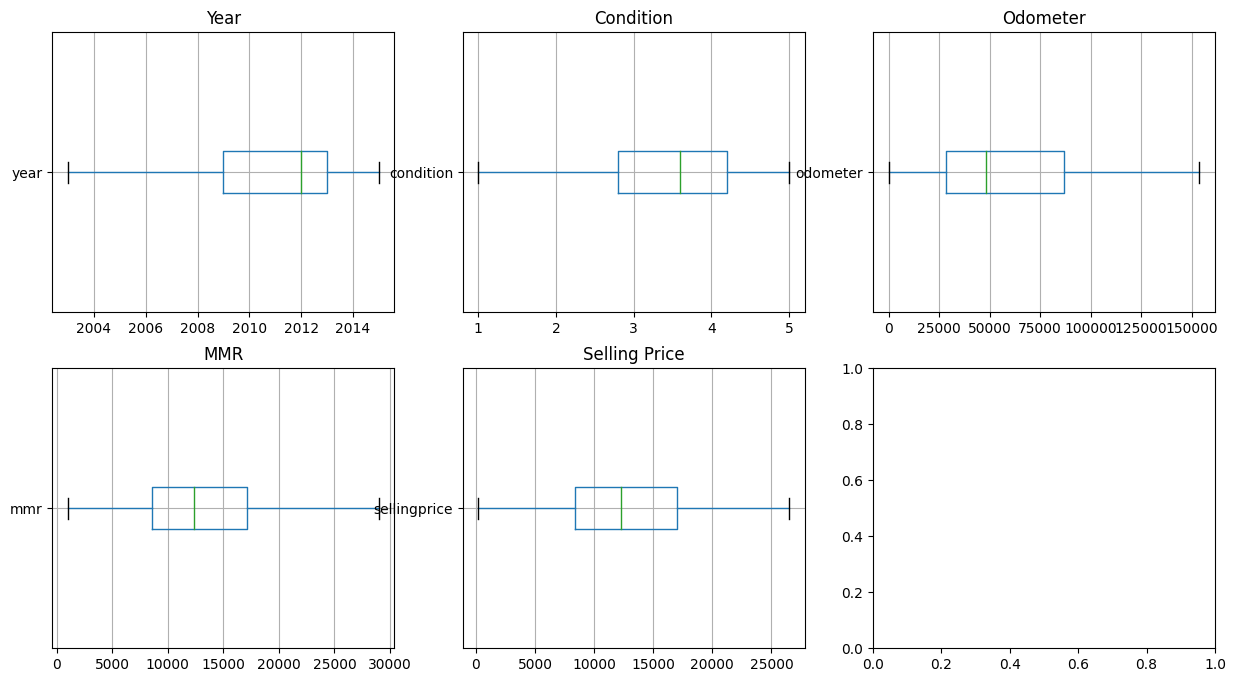

In [ ]:
# code
# vẽ biểu đồ để nhận xét các cột dữ liệu kiểu số
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

data.boxplot(column='year', ax=axes[0,0], vert=False)
data.boxplot(column='condition', ax=axes[0,1], vert=False)
data.boxplot(column='odometer', ax=axes[0,2], vert=False)
data.boxplot(column='mmr', ax=axes[1,0], vert=False)
data.boxplot(column='sellingprice', ax=axes[1,1], vert=False)

axes[0,0].set_title('Year')
axes[0,1].set_title('Condition')
axes[0,2].set_title('Odometer')
axes[1,0].set_title('MMR')
axes[1,1].set_title('Selling Price')

plt.show()

In [ ]:
# chuẩn hóa các cột dữ liệu liên tục
scaler = MinMaxScaler()
data['condition'] = scaler.fit_transform(data[['sellingprice']])
data['odometer'] = scaler.fit_transform(data[['odometer']])
data['mmr'] = scaler.fit_transform(data[['mmr']])
data['sellingprice'] = scaler.fit_transform(data[['sellingprice']])
print(data)

        year      make    model  trim   body transmission                vin state  condition  odometer   color interior                   seller       mmr  sellingprice                                 saledate
529895  2004     Honda   Accord    LX  sedan    automatic  1hgcm56384a080908    nv   0.186312  0.636199  silver    black        fairway chevrolet  0.122431      0.186312  Thu Jun 11 2015 04:50:00 GMT-0700 (PDT)
282209  2015       Kia  Sorento    LX    SUV    automatic  5xyktca60fg586366    co   0.806084  0.067071   black     gray  kia motors america, inc  0.710456      0.806084  Tue Feb 17 2015 04:00:00 GMT-0800 (PST)
...      ...       ...      ...   ...    ...          ...                ...   ...        ...       ...     ...      ...                      ...       ...           ...                                      ...
134300  2012     Honda    Civic    LX  Sedan    automatic  2hgfb2f58ch578643    ny   0.410646  0.181549  silver     gray  fusion auto finance,llc  0.367292 

In [ ]:
# chuyển dữ liệu chuỗi về dạng số
!pip install category_encoders
from category_encoders import TargetEncoder
# chia ra tập train và tập test chuẩn bị dùng TargetEncoder để chuyển đổi dữ liệu từ chuối về số
X = data.drop('sellingprice', axis=1)
y = data['sellingprice']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo một instance của TargetEncoder và mã hóa nhiều cột dữ liệu
encoder = TargetEncoder(cols=['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate'])

# Áp dụng Target Encoding trên tập huấn luyện và biến đổi tập kiểm tra
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)
print(X_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
        year      make     model      trim      body  transmission       vin     state  condition  odometer     color  interior    seller       mmr  saledate
118331  2003  0.406660  0.423262  0.528497  0.426167      0.474833  0.423262  0.452089   0.091255  0.957519  0.494284  0.434700  0.430916  0.039321  0.414971
434657  2013  0.512694  0.518715  0.553495  0.426167      0.474833  0.520225  0.491357   0.836502  0.188867  0.494284  0.441518  0.675446  0.806971  0.530230
...      ...       ...       ...       ...       ...           ...       ...       ...        ...       ...       ...       ...       ...       ...       ...
399438  2013  0.443911  0.443387  0.450670  0.426167      0.474833  0.482627  0.502479   0.547529  0.210422  0.463602  0.516436  0.505205  0.495979  0.486989
378025  2008  0.411167  0.506604  0.465014  0.633796      0.474833  0.499447  0.503629   0.676806  0.669439  0.


Đồ thị hiển thị mức độ quan trọng của các thuộc tính



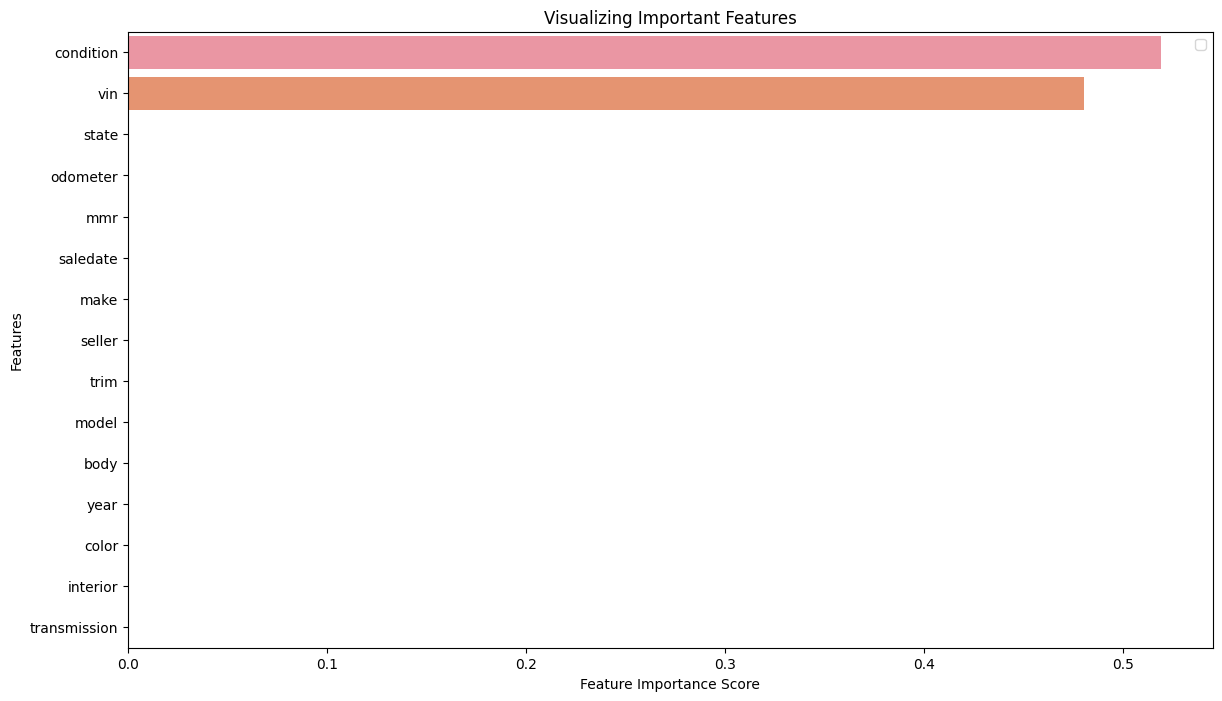

In [ ]:
clf=RandomForestRegressor()
clf.fit(X_train,y_train)
# kiểm tra mức độ quan trọng của các thuộc tính nhằm giảm dữ liệu
# mức độ quan trọng các feature theo giá trị giảm dần
feature_names = X_train.columns.tolist()
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
fig = plt.figure()
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
fig.set_size_inches(14, 8)
print('\nĐồ thị hiển thị mức độ quan trọng của các thuộc tính\n')
plt.show()

In [ ]:
# Chọn các thuộc tính quan trọng và tạo tập dữ liệu mới
# features = feature_imp.index[0:4].values
# X_train = X_train[feature_imp.index[0:4]]
# X_test = X_test[feature_imp.index[0:4]]
features = feature_imp.index[0:2].values
X_train = X_train[feature_imp.index[0:2]]
X_test = X_test[feature_imp.index[0:2]]
print('\nTheo biểu đồ ta chọn ra được 7 thuộc tính có giá trị quan trọng cao nhất và tạo thành tập dữ liệu mới')
print(X_train)


Theo biểu đồ ta chọn ra được 7 thuộc tính có giá trị quan trọng cao nhất và tạo thành tập dữ liệu mới
        condition       vin
118331   0.091255  0.423262
434657   0.836502  0.520225
...           ...       ...
399438   0.547529  0.482627
378025   0.676806  0.499447

[6555 rows x 2 columns]


In [ ]:
from sklearn.model_selection import cross_val_score
# dùng Cross-validation để tránh overfitting

# Xây dựng mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
me_rf = round(np.mean(-scores_rf),4) 
r2_rf = round(np.mean(scores_r2_rf), 4)

# Xây dựng mô hình Decision Tree
dtr = DecisionTreeRegressor(random_state=42)
scores_dtr = cross_val_score(dtr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2_dtr = cross_val_score(dtr, X_train, y_train, cv=5, scoring='r2')
me_dtr = round(np.mean(-scores_dtr),4) 
r2_dtr = round(np.mean(scores_r2_dtr), 4)

# Xây dựng mô hình SVM rbf
svr_rbf = SVR(kernel='rbf')
scores_svr_rbf = cross_val_score(svr_rbf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2_svr_rbf = cross_val_score(svr_rbf, X_train, y_train, cv=5, scoring='r2')
me_svr_rbf = round(np.mean(-scores_svr_rbf),4) 
r2_svr_rbf = round(np.mean(scores_r2_svr_rbf), 4)

# Xây dựng mô hình SVM linear
svr_ln = SVR(kernel='linear')
scores_svr_ln = cross_val_score(svr_ln, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2_svr_ln = cross_val_score(svr_ln, X_train, y_train, cv=5, scoring='r2')
me_svr_ln = round(np.mean(-scores_svr_ln),4) 
r2_svr_ln = round(np.mean(scores_r2_svr_ln), 4)


# Xây dựng mô hình KNN
knn = KNeighborsRegressor(n_neighbors=5)
scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
me_knn = round(np.mean(-scores_knn),4) 
r2_knn = round(np.mean(scores_r2_knn), 4)

# Xây dựng mô hình Neural Network
nr = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=44)
scores_nr = cross_val_score(nr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2_nr = cross_val_score(nr, X_train, y_train, cv=5, scoring='r2')
me_nr = round(np.mean(-scores_nr),4) 
r2_nr = round(np.mean(scores_r2_nr), 4)


t1 = PrettyTable(["Algorithm",'Mean Squared Error', 'R2 Score'])
t1.add_row(["Random Fores",me_rf, r2_rf])
t1.add_row(["Decision Tree",me_dtr, r2_dtr])
t1.add_row(["KNN",me_knn, r2_knn])
t1.add_row(["SVM kernal rbf",me_svr_rbf, r2_svr_rbf])
t1.add_row(["SVM kernal linear",me_svr_ln, r2_svr_ln])
t1.add_row(["Neural Network",me_nr, r2_nr])


print(t1)

+-------------------+--------------------+----------+
|     Algorithm     | Mean Squared Error | R2 Score |
+-------------------+--------------------+----------+
|    Random Fores   |        0.0         |   1.0    |
|   Decision Tree   |        0.0         |   1.0    |
|        KNN        |        0.0         |   1.0    |
|   SVM kernal rbf  |       0.0051       |  0.9019  |
| SVM kernal linear |       0.0021       |  0.959   |
|   Neural Network  |        0.0         |   1.0    |
+-------------------+--------------------+----------+


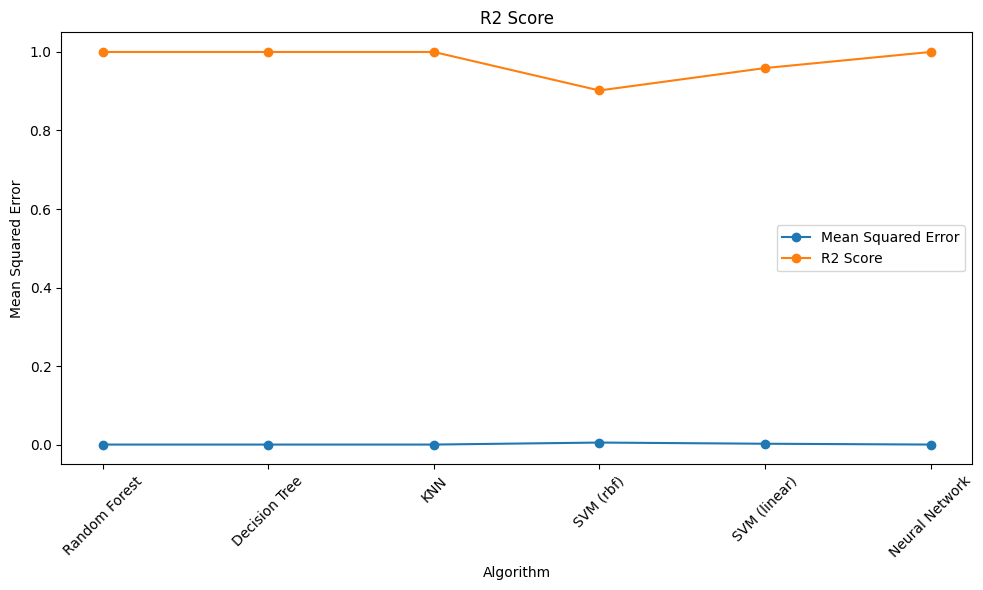

In [ ]:
# Dữ liệu từ bảng
algorithm = ["Random Forest", "Decision Tree", "KNN", "SVM (rbf)", "SVM (linear)", "Neural Network"]
mse = [me_rf, me_dtr, me_knn, me_svr_rbf, me_svr_ln, me_nr]
r2_score = [r2_rf, r2_dtr, r2_knn, r2_svr_rbf, r2_svr_ln, r2_nr]

plt.figure(figsize=(10, 6))
plt.plot(algorithm, mse, marker='o', label='Mean Squared Error')
plt.plot(algorithm, r2_score, marker='o', label='R2 Score')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.title('R2 Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()